In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 2s 0us/step


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [6]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid',activation='relu',strides=1))
#strides=1 마스크가 한칸씩 이동한다
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))#출력 하나(긍정 이거나 부정)
model.add(Activation('sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train, batch_size=100, epochs=10,
                 validation_data=(x_test, y_test))

Epoch 1/10
250/250 [==============================] - 14s 50ms/step - loss: 0.4574 - accuracy: 0.7669 - val_loss: 0.3404 - val_accuracy: 0.8484
Epoch 2/10
250/250 [==============================] - 12s 49ms/step - loss: 0.2915 - accuracy: 0.8781 - val_loss: 0.3273 - val_accuracy: 0.8554
Epoch 3/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2480 - accuracy: 0.9002 - val_loss: 0.3347 - val_accuracy: 0.8568
Epoch 4/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2118 - accuracy: 0.9180 - val_loss: 0.3439 - val_accuracy: 0.8542
Epoch 5/10
250/250 [==============================] - 13s 51ms/step - loss: 0.1757 - accuracy: 0.9339 - val_loss: 0.3970 - val_accuracy: 0.8454
Epoch 6/10
250/250 [==============================] - 13s 54ms/step - loss: 0.1513 - accuracy: 0.9434 - val_loss: 0.3794 - val_accuracy: 0.8480
Epoch 7/10
250/250 [==============================] - 14s 55ms/step - loss: 0.1265 - accuracy: 0.9536 - val_loss: 0.4173 - val_accuracy:

In [11]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.5712 - accuracy: 0.8419
Test Accuracy: 0.8419


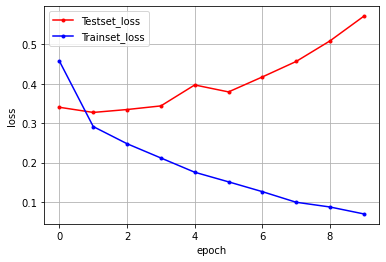

In [13]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()